In [10]:
import numpy as np
import pandas as pd

import anndata as ad

import scanpy as sc
import squidpy as sq

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")


scanpy==1.9.8 anndata==0.10.5.post1 umap==0.5.5 numpy==1.26.4 scipy==1.12.0 pandas==2.2.0 scikit-learn==1.4.0 statsmodels==0.14.1 igraph==0.11.5 pynndescent==0.5.11
squidpy==1.5.0


In [14]:
import urllib.request as urlrq
import certifi
import ssl

try:
   _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [6]:
#!pip install squidpy

In [15]:
# load the pre-processed dataset
img = sq.datasets.visium_hne_image()
adata = sq.datasets.visium_hne_adata()

100%|████████████████████████████████████████████████████████████████████████████████████| 380M/380M [02:45<00:00, 2.41MB/s]
100%|████████████████████████████████████████████████████████████████████████████████████| 314M/314M [03:18<00:00, 1.66MB/s]
/home/savita/miniconda3/envs/py3/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [16]:
adata

AnnData object with n_obs × n_vars = 2688 × 18078
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [17]:
img

ImageContainer[shape=(11757, 11291), layers=['image']]

In [18]:
# load the pre-processed dataset
adata2 = sq.datasets.merfish()
adata2

100%|██████████████████████████████████████████████████████████████████████████████████| 49.2M/49.2M [00:36<00:00, 1.40MB/s]
/home/savita/miniconda3/envs/py3/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [19]:
adata2

AnnData object with n_obs × n_vars = 73655 × 161
    obs: 'Cell_ID', 'Animal_ID', 'Animal_sex', 'Behavior', 'Bregma', 'Centroid_X', 'Centroid_Y', 'Cell_class', 'Neuron_cluster_ID', 'batch'
    uns: 'Cell_class_colors'
    obsm: 'spatial', 'spatial3d'

/home/savita/miniconda3/envs/py3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/savita/miniconda3/envs/py3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:327: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = ax.scatter(


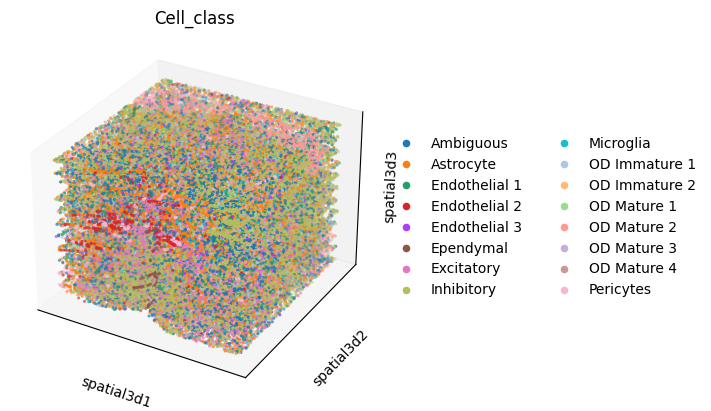

In [21]:
sc.pl.embedding(adata2, basis="spatial3d", projection="3d", color="Cell_class")

/home/savita/miniconda3/envs/py3/lib/python3.11/site-packages/squidpy/pl/_color_utils.py:28: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/home/savita/miniconda3/envs/py3/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


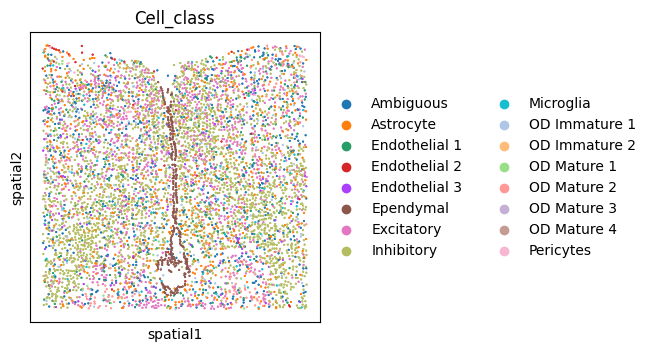

In [24]:
sq.pl.spatial_scatter(
    adata2[adata2.obs.Bregma == -9], shape=None, color="Cell_class", size=1
)

100%|████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 154.25/s]


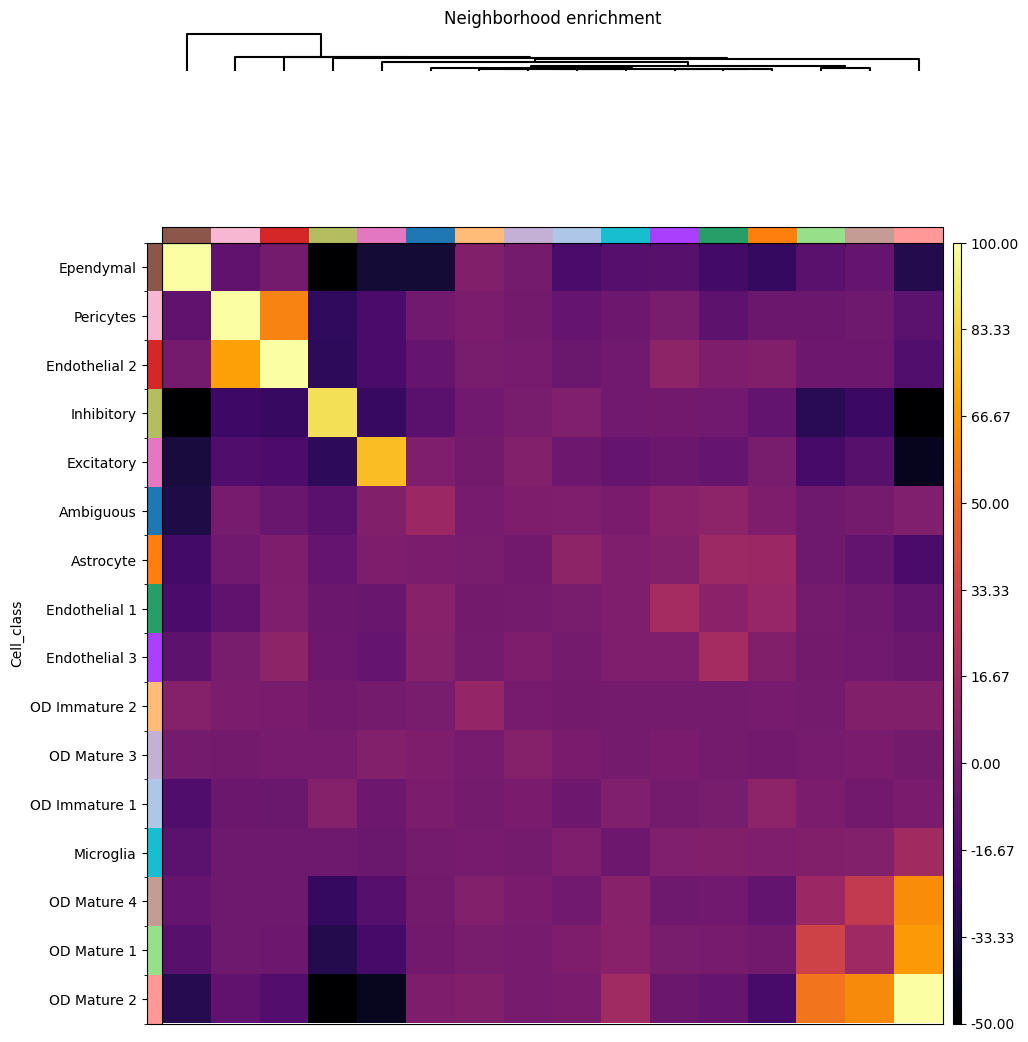

In [25]:
sq.gr.spatial_neighbors(adata2, coord_type="generic", spatial_key="spatial3d")
sq.gr.nhood_enrichment(adata2, cluster_key="Cell_class")
sq.pl.nhood_enrichment(
    adata2, cluster_key="Cell_class", method="single", cmap="inferno", vmin=-50, vmax=100
)

/home/savita/miniconda3/envs/py3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/savita/miniconda3/envs/py3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:327: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = ax.scatter(


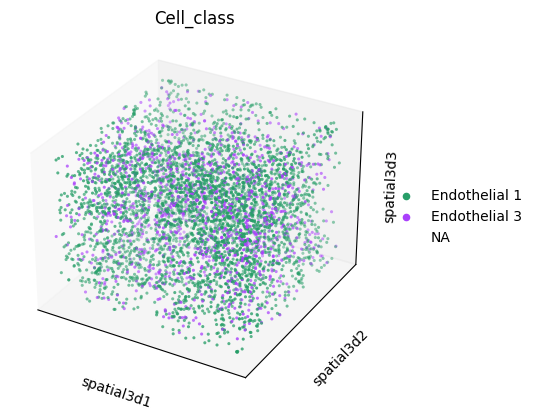

In [26]:
sc.pl.embedding(
    adata2,
    basis="spatial3d",
    groups=["Endothelial 1", "Endothelial 3"],
    na_color=(1, 1, 1, 0),
    projection="3d",
    color="Cell_class",
)

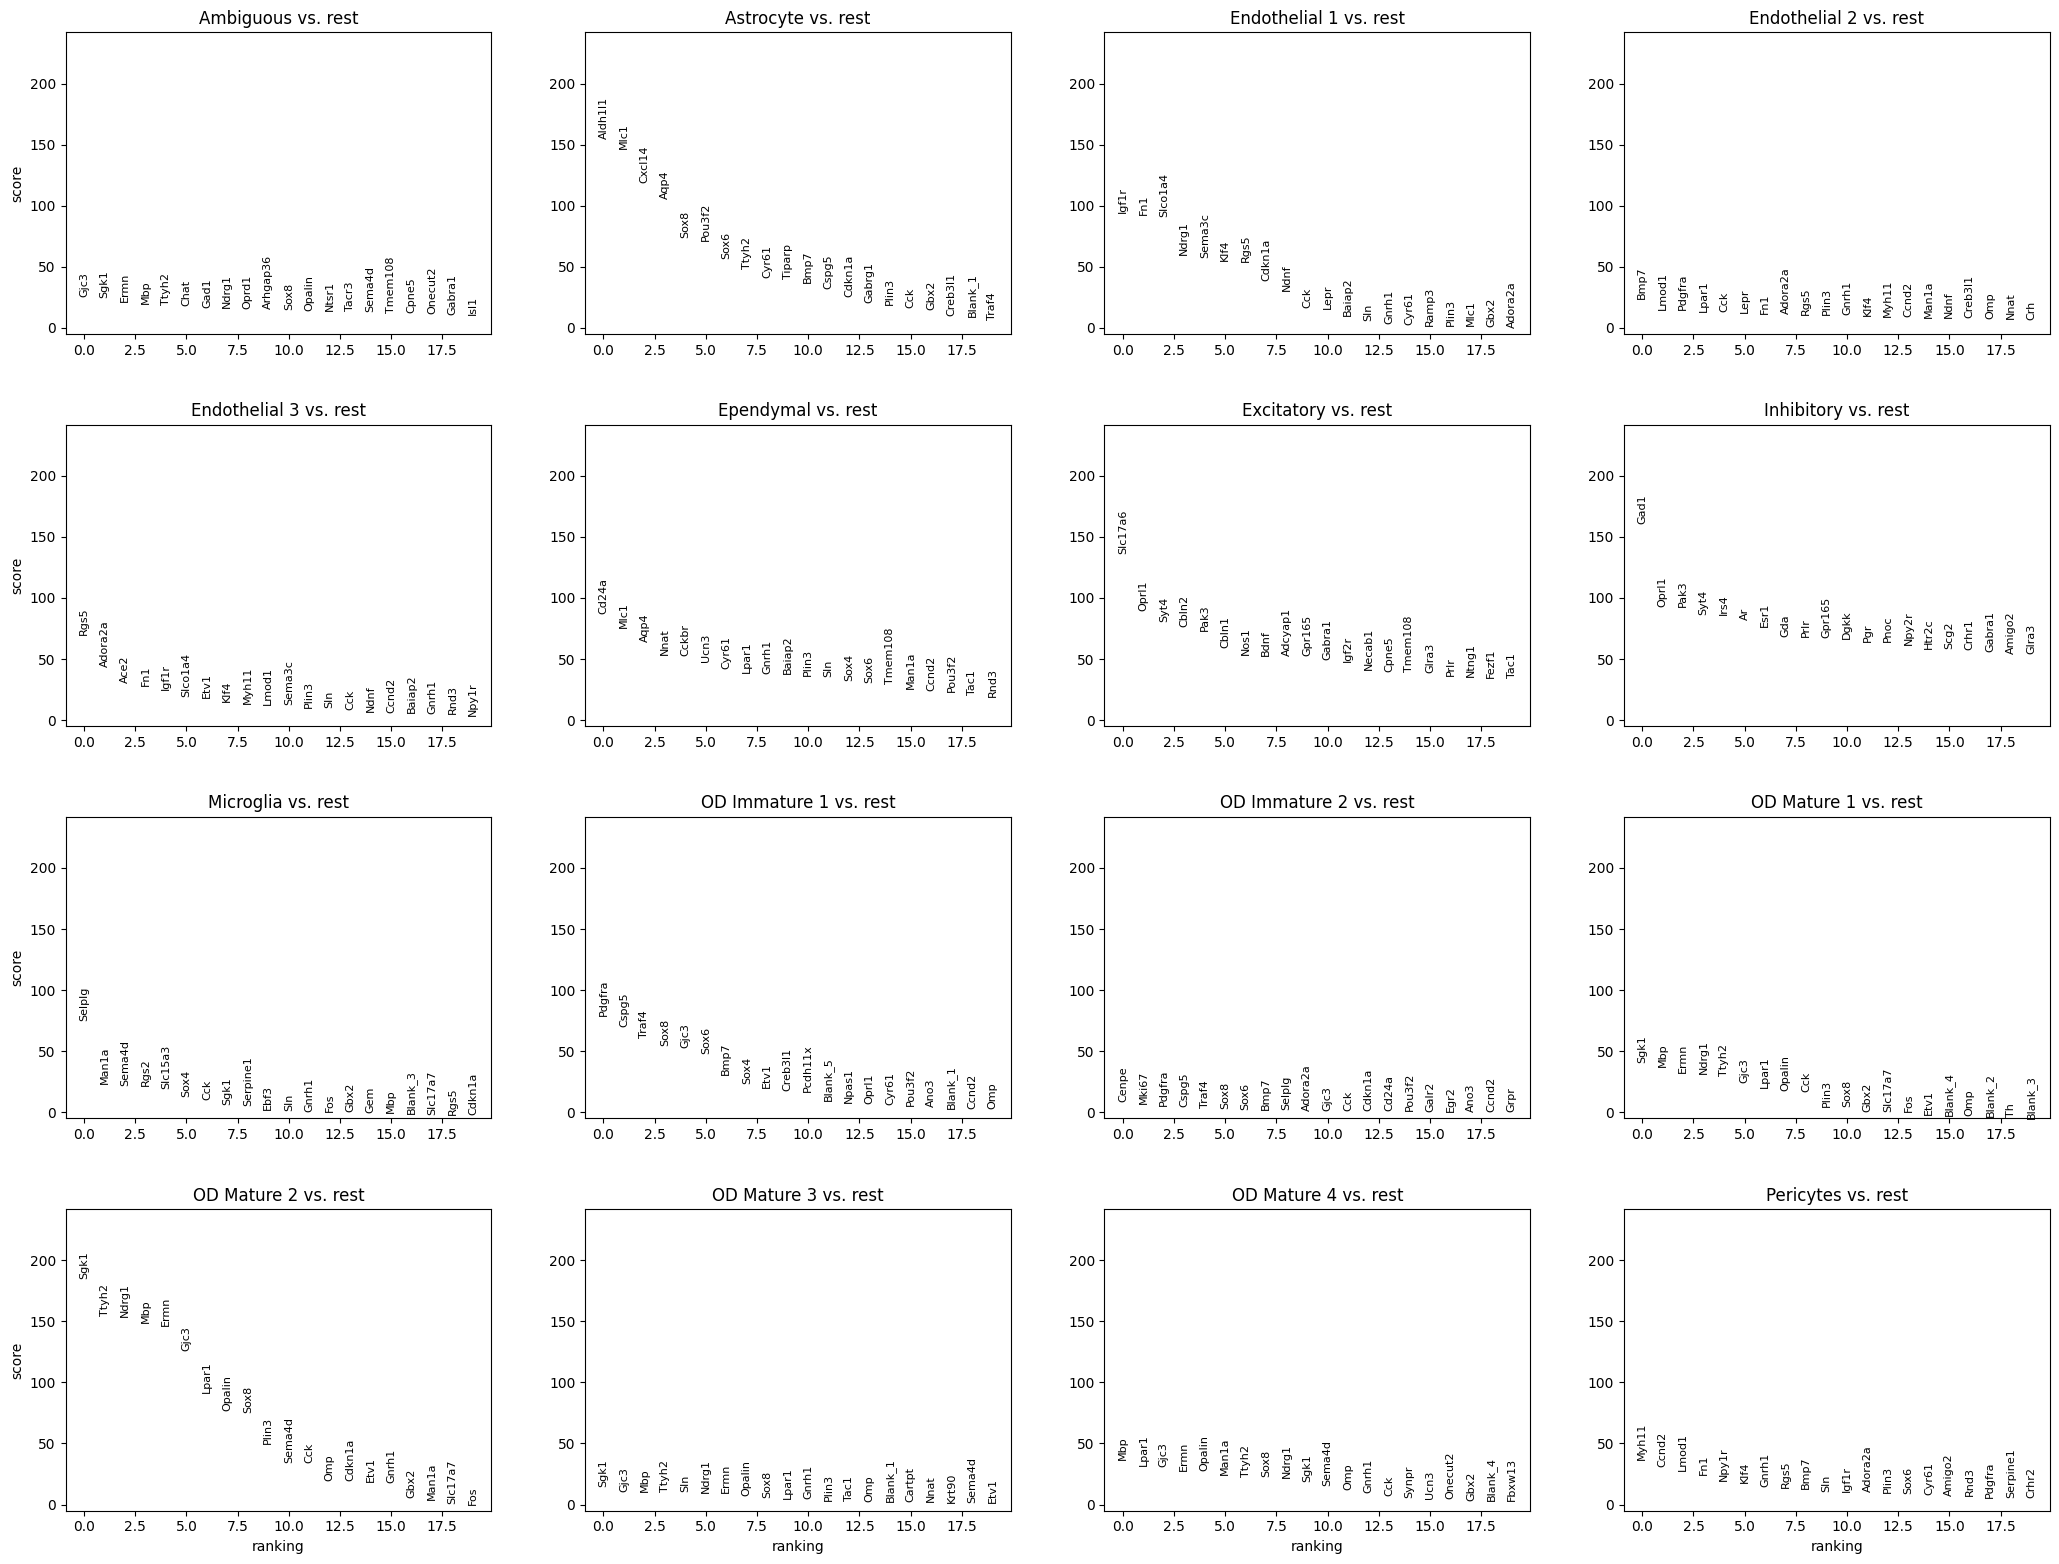

In [34]:
sc.tl.rank_genes_groups(adata2, groupby="Cell_class")
sc.pl.rank_genes_groups(adata2, groupby="Cell_class")

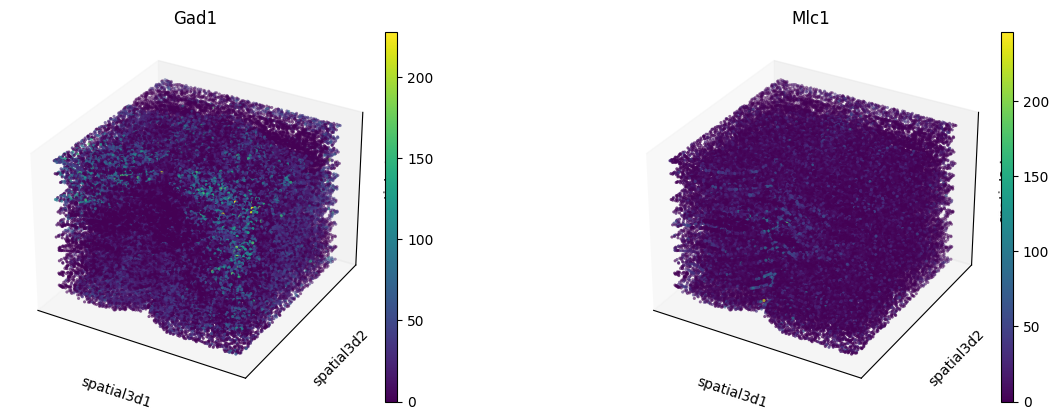

In [36]:
sc.pl.embedding(adata2, basis="spatial3d", projection="3d", color=["Gad1", "Mlc1"])

100%|████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 201.45/s]


/home/savita/miniconda3/envs/py3/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


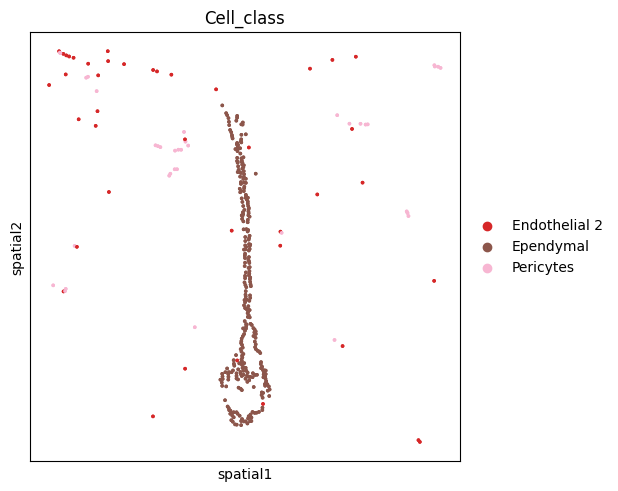

In [37]:
adata_slice = adata2[adata2.obs.Bregma == -9].copy()
sq.gr.spatial_neighbors(adata_slice, coord_type="generic")
sq.gr.nhood_enrichment(adata2, cluster_key="Cell_class")
sq.pl.spatial_scatter(
    adata_slice,
    color="Cell_class",
    shape=None,
    groups=[
        "Ependymal",
        "Pericytes",
        "Endothelial 2",
    ],
    size=10,
)

In [49]:
sq.gr.spatial_autocorr(adata_slice, mode="moran")
adata_slice.uns["moranI"].head()


/home/savita/miniconda3/envs/py3/lib/python3.11/site-packages/scanpy/metrics/_gearys_c.py:295: UserWarning: 1 variables were constant, will return nan for these.
  warnings.warn(


,I,pval_norm,var_norm,pval_norm_fdr_bh
Nnat,0.733661,0.0,0.00005,NaN
Sln,0.639211,0.0,0.00005,NaN
Cd24a,0.606546,0.0,0.00005,NaN
Necab1,0.399385,0.0,0.00005,NaN
Mbp,0.397534,0.0,0.00005,NaN


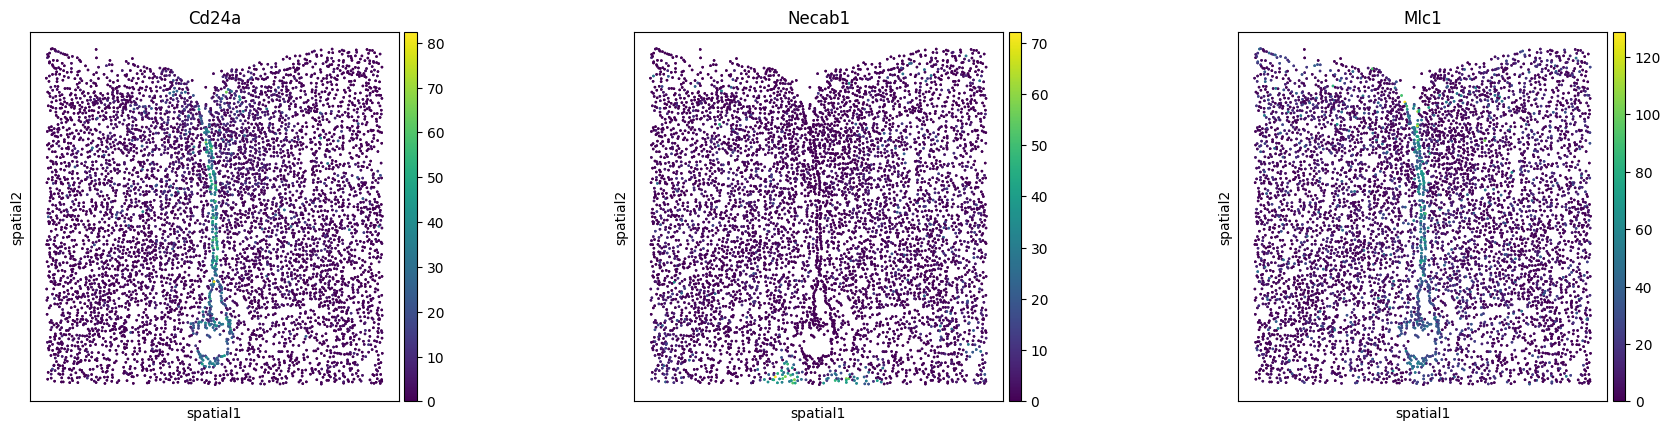

In [50]:
sq.pl.spatial_scatter(
    adata_slice, shape=None, color=["Cd24a", "Necab1", "Mlc1"], size=3
)

In [51]:
adata2.var_names_make_unique()
sq.gr.spatial_autocorr(adata2, mode="moran")
adata2.uns["moranI"].head(10)

/home/savita/miniconda3/envs/py3/lib/python3.11/site-packages/scanpy/metrics/_gearys_c.py:295: UserWarning: 1 variables were constant, will return nan for these.
  warnings.warn(


,I,pval_norm,var_norm,pval_norm_fdr_bh
Nnat,0.706746,0.0,0.000004,NaN
Mbp,0.648363,0.0,0.000004,NaN
Sln,0.642610,0.0,0.000004,NaN
Ebf3,0.577148,0.0,0.000004,NaN
Cd24a,0.551375,0.0,0.000004,NaN
Myh11,0.453694,0.0,0.000004,NaN
Lmod1,0.406411,0.0,0.000004,NaN
Cck,0.391337,0.0,0.000004,NaN
Esr1,0.373026,0.0,0.000004,NaN
Ndrg1,0.370499,0.0,0.000004,NaN


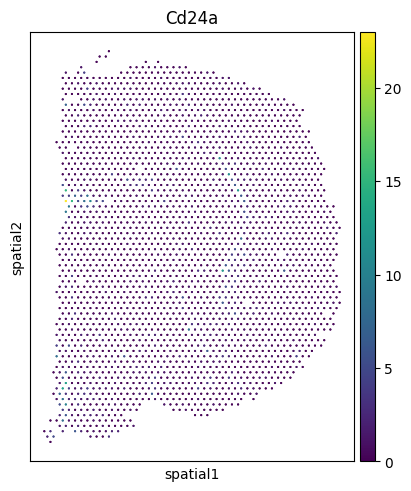

In [58]:
sq.pl.spatial_scatter(adata, shape=None, color="Cd24a", size=1)